<a href="https://colab.research.google.com/github/nathancomley/ASSIGNMENT-2/blob/main/Programming_Assignment_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Enron Email analysis.
*By Nathan Comley*
> 20614672

##Introduction.
Enron was an energy company that was formed in 1985 which experienced a disgraceful fall leading to bankruptcy in 2002 (Segal 2021).
Enron began out as an energy company that had had its own network of pipelines for natural gas, later in the start of the 90’s decade Enron decided to shift their business model to focus on making energy deals as a supplier of energy rather than a producer (Bondarenko 2021). This effectively allowed Enron to be somewhat of a ‘middle-man’ between the producers and the customers of natural gas (Bondarenko 2021). 

Along with this change came massive success for the company with Enron growing to be one of the largest firms in America consisting of thousands of employees and over 60 billion dollars in assets (Bondarenko 2021) (Segal 2021). Considering this information, the power and influence of this company becomes very apparent which makes the effects of their actions even more devastating and widespread.

Under the leadership of Jeffery Skilling, Enron was committing fraud. Specifically, through misleading shareholders into believing that their income profits where higher than they were (Bondarenko 2021).

After the shocking and sudden resignation of Jeffery Skilling a major red flag was raised, and analyst started to uncover the wrong doings of the Enron executives (Bondarenko 2021). Shortly after in late 2001 Enron would file for bankruptcy leaving a profound effect on the market and the thousands of innocent employees that was hired by Enron (Bondarenko 2021).

Although a tragic and scandalous display of corporate greed, A valuable dataset of emails between different Enron executives were left behind and exposed to the public by the Federal Energy Regulatory Commission (Diesner et al 2005).  This email set would prove helpful for the future and for prosecutions of Enron executives.


This specific business report will be focusing on analysing who the top ten emailers of the organisation are and the number of messages each day by date.


##Analysis

---



In this section a graph will be displayed though a series of code cells, this graph will then be analysed.
Please run the code cells in ascending order. The text in green will explain what each set of code is doing.


> Please run the code cells in **ascending** order. The text in **green** will explain what each set of code is doing. If the graph appears small, please run the cell again.





In [1]:
#Importing the Enron email database.

!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2022-05-29 09:08:47--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-29 09:08:49--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  30.0MB/s    in 25s     

2022-05-29 09:09:14 (32.4 MB/s) - ‘enron.db’ saved [853819392/853819392]



In [2]:
#Importing modules I will use.

import sqlite3

conn = sqlite3.connect("enron.db")

cur = conn.cursor()

import pandas as pd

##Analysis of the number of messages each day by date.


In [3]:
#New Query for the number of messages that were sent to/from Enron employees by date.

sql='''
   SELECT date(date) AS date_sent, count(mid) AS message_count
   FROM message
   GROUP BY date_sent
   ORDER BY date_sent;
'''
# Load the data into a DataFrame
NewCountByDate_df = pd.read_sql_query(sql,conn)
NewCountByDate_df

,date_sent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


Text(0, 0.5, ' Number of Messages')

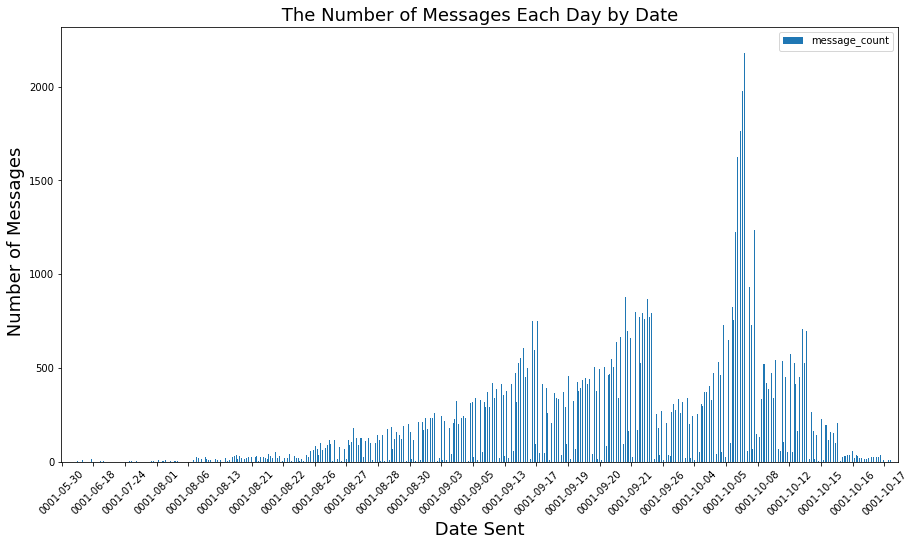

In [5]:
#plotting the number of messages each day by date with pandas
#Help found on https://stackoverflow.com/a/68150462

from matplotlib import pyplot as plt

NewCountByDate_df.plot(x = 'date_sent', y = 'message_count', kind='bar')

#seting up the tick range

start = 0

end = len(NewCountByDate_df['date_sent'])

steps = 50

 
# updating the ticks on the plot

_ = plt.xticks(range(start, end, steps),rotation=45)

#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]

#Labeling the axis, and changing their font size.
plt.title(" The Number of Messages Each Day by Date ", fontsize = 18)
plt.xlabel(" Date Sent ", fontsize = 18)
plt.ylabel(" Number of Messages", fontsize = 18)

In [6]:
#Along with the graph, this table will show the top 20 days that had the most emails sent.

#code to order by message_count.

sql='''
   SELECT date(date) AS date_sent, count(mid) AS message_count
   FROM message
   GROUP BY date_sent
   ORDER BY message_count;
'''
# Load the data into a DataFrame
OrderedbyMessages_df = pd.read_sql_query(sql,conn)
OrderedbyMessages_df

,date_sent,message_count
0,0001-06-18,1
1,0001-07-24,1
2,0001-08-01,1
3,0001-08-06,1
4,0001-08-13,1
...,...,...
1318,2001-10-22,2025
1319,2001-11-26,2031
1320,2001-11-27,2045
1321,2001-10-29,2180


In [7]:
#This table officially shows the top 20 days where the most emails where sent.

Top20DaysWithMostEmails_df = OrderedbyMessages_df.tail(20)
Top20DaysWithMostEmails_df

,date_sent,message_count
1303,2000-12-13,1171
1304,2001-10-15,1225
1305,2001-11-14,1238
1306,2001-10-17,1251
1307,2001-10-16,1273
1308,2001-06-27,1321
1309,2001-10-19,1362
1310,2001-11-21,1365
1311,2001-10-18,1624
1312,2001-11-20,1723


From this table it is evident that the most active days for messages sent was in the late months of 2001. Specifically in the months of October and November. This is evident in the table as out of the twenty days with the highest number of emails, seventeen of those days where either in October or November of 2001. The ones that were not that date range where in December of 2000, June 2001 and in January of 2002.
From the graph we can also tell that October had considerably more activity than the other dates.


##Analysis of the top ten email senders.

In [8]:
#Query for number of emails for each employee.

sql= '''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count;
 '''

# Load the data into a DataFrame
NumberOfEmailsPerEmployee_df = pd.read_sql_query(sql,conn)
NumberOfEmailsPerEmployee_df

,sender,message_count
0,0_19619_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
1,0_19653_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
2,0_19812_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
3,1.11176403.-3@multexinvestornetwork.com,1
4,1.11176403.999@multexinvestornetwork.com,1
...,...,...
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838


In [9]:
#This code will show the Top Ten email senders.

top10_df = NumberOfEmailsPerEmployee_df.tail(10)
top10_df

,sender,message_count
17517,debra.perlingiere@enron.com,2549
17518,matthew.lenhart@enron.com,2784
17519,enron.announcements@enron.com,2838
17520,no.address@enron.com,3511
17521,chris.germany@enron.com,3686
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838
17526,jeff.dasovich@enron.com,6273


Text(0, 0.5, 'Message Count')

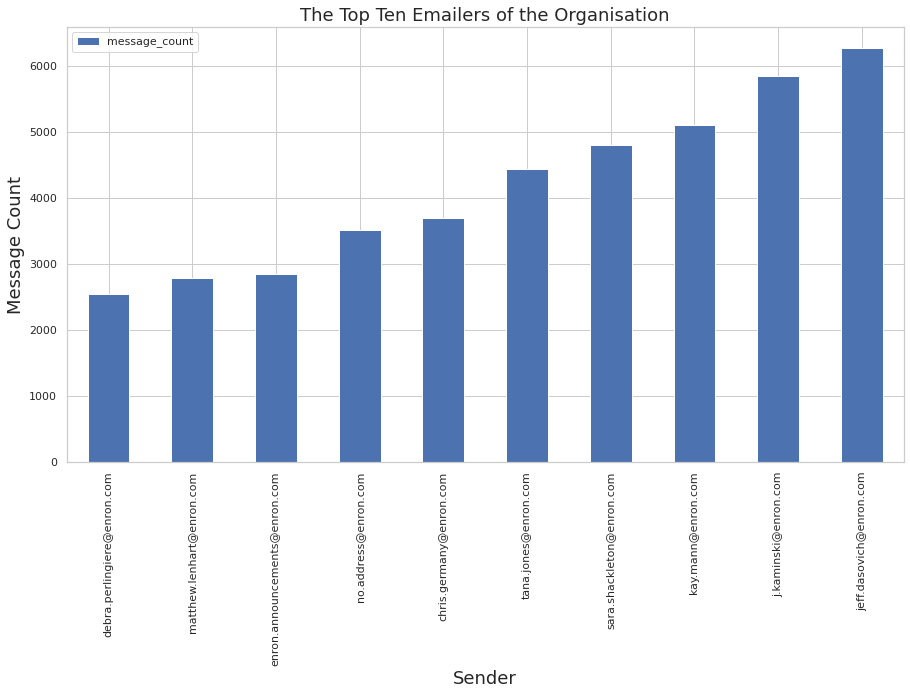

In [10]:
#Plotting top 10 senders. Info used from
# https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/#bar-charts-the-king-of-plots
# https://www.sidmartinbio.org/how-do-i-change-the-label-size-in-matplotlib/#How_do_I_change_the_label_size_in_Matplotlib

from matplotlib import pyplot as plt

#new styles
import seaborn as sns
sns.set_theme(style="whitegrid")

#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]

#Plotting the data
top10_df.plot(x ='sender', y='message_count', kind = 'bar')

#Labeling the axis, and changing their font size.
plt.title("The Top Ten Emailers of the Organisation", fontsize = 18)
plt.xlabel("Sender", fontsize = 18)
plt.ylabel("Message Count", fontsize = 18)

As evident from the graph, the top email sender was Jeff Dasovich with 6273 emails sent. He was closely followed by j.kaminski@enron.com in second and kay.mann@enron.com in third place. The split between all these senders in the top three is very small (referring to the number of emails sent). Towards the tail end of the top ten email senders is debra.perlingiere@enron.com with 2549, matthew.lenhart@enron.com with 2784 and enron.announcements@enron.com with 2838 emails sent.

##Discussion

It is vital to explore and provide reason for trends in the data.

One of the top emailers Kay Mann was the boss in Enron’s legal department (Tiwari 2021). We can see a considerable number of emails from her, but she was never convicted of any wrongdoing (Tiwari 2021). Jeff Dasovich is also a top sender. He was a government relations executive at Enron suggesting he was in a position of high power and influence (Mithileysh 2022). Although he is one of the top email senders, whether or not he has had any involvement in the company’s fraudulent activities has not been proven. In saying this there is evidence that he did communicate with executives who did partake in fraud such as Timothy Belden (Linkurious 2016). Belden pled guilty after his involvement was discovered in 2002 (Kravets 2002). Enron Announcements is also a top sender. Judging from the name, this sender probably only set out emails to notify to employees of changes and events coming up within the company.

From the “Number of Messages Each Day by Date” graph and table, the key trend that can be identified is that in October and November of 2001 the most messages are sent. A reason for this could be because the dates are close to when the company filed for bankruptcy. Enron filed for bankruptcy on the 2nd of December 2001 (Segal 2021). In the months leading up to this (October- November) employees may have caught wind about the company’s demise, potentially driving up the number of messages sent out of panic or seeking closure of what is happening with the situation.
There was also a range of events that occurred within the company in October and November which would explain the unusually high traffic of messages sent. These events include a legal counsel telling auditors to destroy Enron’s files, Enron’s share price falling to around $20 USD per share and Enron admitting to having inflated its income (Segal 2021). With all these huge events it is clear to see why email traffic would have been high in the company at that time.


##Conclusion.

Through analysing who the top emailers where and which days had the most messages sent, links start to appear.
The link between emails sent and when key events happened is fascinating as the timelines match up very well. These significant events in the company occurring in October and November of 2001 leading to a massive uprising of messages sent can also give us an indication of human nature and how the employees and executives may have been feeling at the time. A further study looking at this should be considered. The top ten emailers unfortunately did not provide us with the insight I was expecting as most of the emailers did not have a substantial roll in the case. This however did spark my interest and had me considering what further investigation should be done. I would consider trying to find a link between when these emailers were sending out most of their emails and what was happening in the company at the time. I would also suggest key words are identified that was often used by these top emailers to get an idea of the subject matters they were discussing.

Throughout investigating this case it is hard to ignore the very real human impact of Enron’s actions, for example the thousands of innocent employees losing their source of income and the investors loosing large portions of their capital. Hopefully a lesson can be learned from this tragic case.


##References.


Bondarenko, Peter. 2021. "Enron Scandal Summary, Explained,      History, & Facts". Encyclopedia Britannica. https://www.britannica.com/event/Enron-scandal.


"Enron Scandal Case Study: A Narrative Visualisation". 2022. Codepen. https://codepen.io/mithileysh/post/enron-scandal-case-study-a-narrative-visualisation.


"Investigating Enron’S Email Corpus: The Trail Of Tim Belden". 2016. Linkurious. https://linkurious.com/blog/investigating-the-enron-email-dataset/.


Segal, Troy. 2021. "Enron Scandal: The Fall Of A Wall Street Darling". Investopedia. https://www.investopedia.com/updates/enron-scandal-summary/.


Tiwari, Shantnu. 2021. "Analysing The Enron Email Corpus". Python For Engineers. https://new.pythonforengineers.com/blog/analysing-the-enron-email-corpus/.


Diesner, Jana, Terrill L. Frantz, and Kathleen M. Carley. 2005. "Communication Networks from the Enron Email Corpus "it's always about the People. Enron is no Different"." Computational and Mathematical Organization Theory 11 (3) (10): 201-228. doi:https://doi.org/10.1007/s10588-005-5377-0. https://www.proquest.com/scholarly-journals/communication-networks-enron-email-corpus-always/docview/201657006/se-2?accountid=10382.
